In [ ]:
#Imports
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.colors as clr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_absolute_error, explained_variance_score

In [ ]:
#Creates dataframe and describes it
url = 'https://drive.google.com/file/d/1DplLQ86Ti65eMfUXF1c7jNwKm7jbq6an/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.info()
df.describe()

#Drops null values in the rows
df.dropna(axis=0,how='any',inplace=True)
#Drops unnecessary columns like link and song ID that won't be that helpful to the analysis
df.drop(columns=['track_id','playlist_url','track_name', 'artist_name', 'album', 'album_cover', 'artist_genres'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9198 entries, 0 to 9197
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           9198 non-null   object 
 1   playlist_url       9198 non-null   object 
 2   playlist_name      9198 non-null   object 
 3   track_name         9198 non-null   object 
 4   track_popularity   9198 non-null   int64  
 5   artist_name        9198 non-null   object 
 6   album              9198 non-null   object 
 7   album_cover        9198 non-null   object 
 8   artist_genres      9198 non-null   object 
 9   artist_popularity  9198 non-null   int64  
 10  danceability       9198 non-null   float64
 11  energy             9198 non-null   float64
 12  key                9198 non-null   int64  
 13  loudness           9198 non-null   float64
 14  mode               9198 non-null   int64  
 15  speechiness        9198 non-null   float64
 16  acousticness       9198 

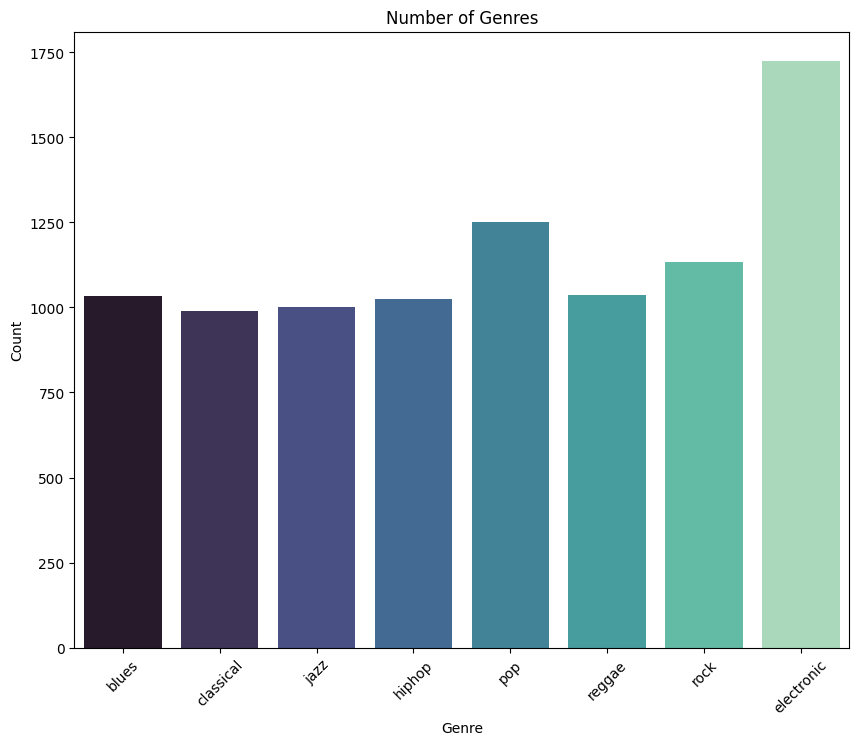

In [ ]:
#Bar chart of different genres
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='genre', palette='mako')
plt.title('Number of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

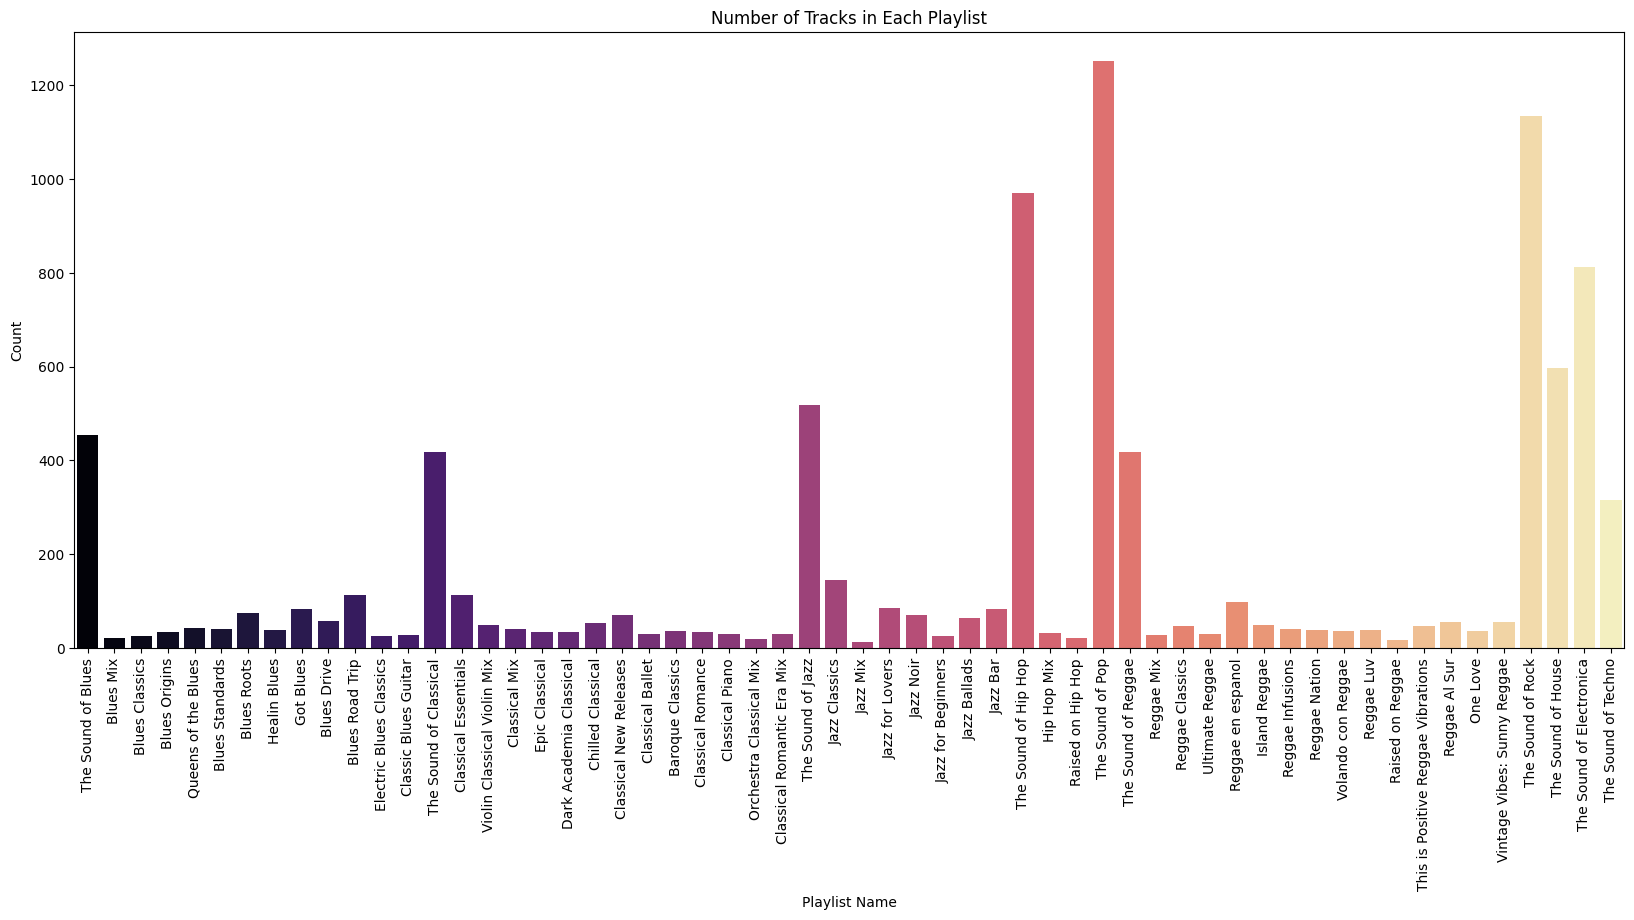

In [ ]:
#Bar chart of different playlists
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x='playlist_name', palette='magma')
plt.title('Number of Tracks in Each Playlist')
plt.xlabel('Playlist Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


<Axes: >

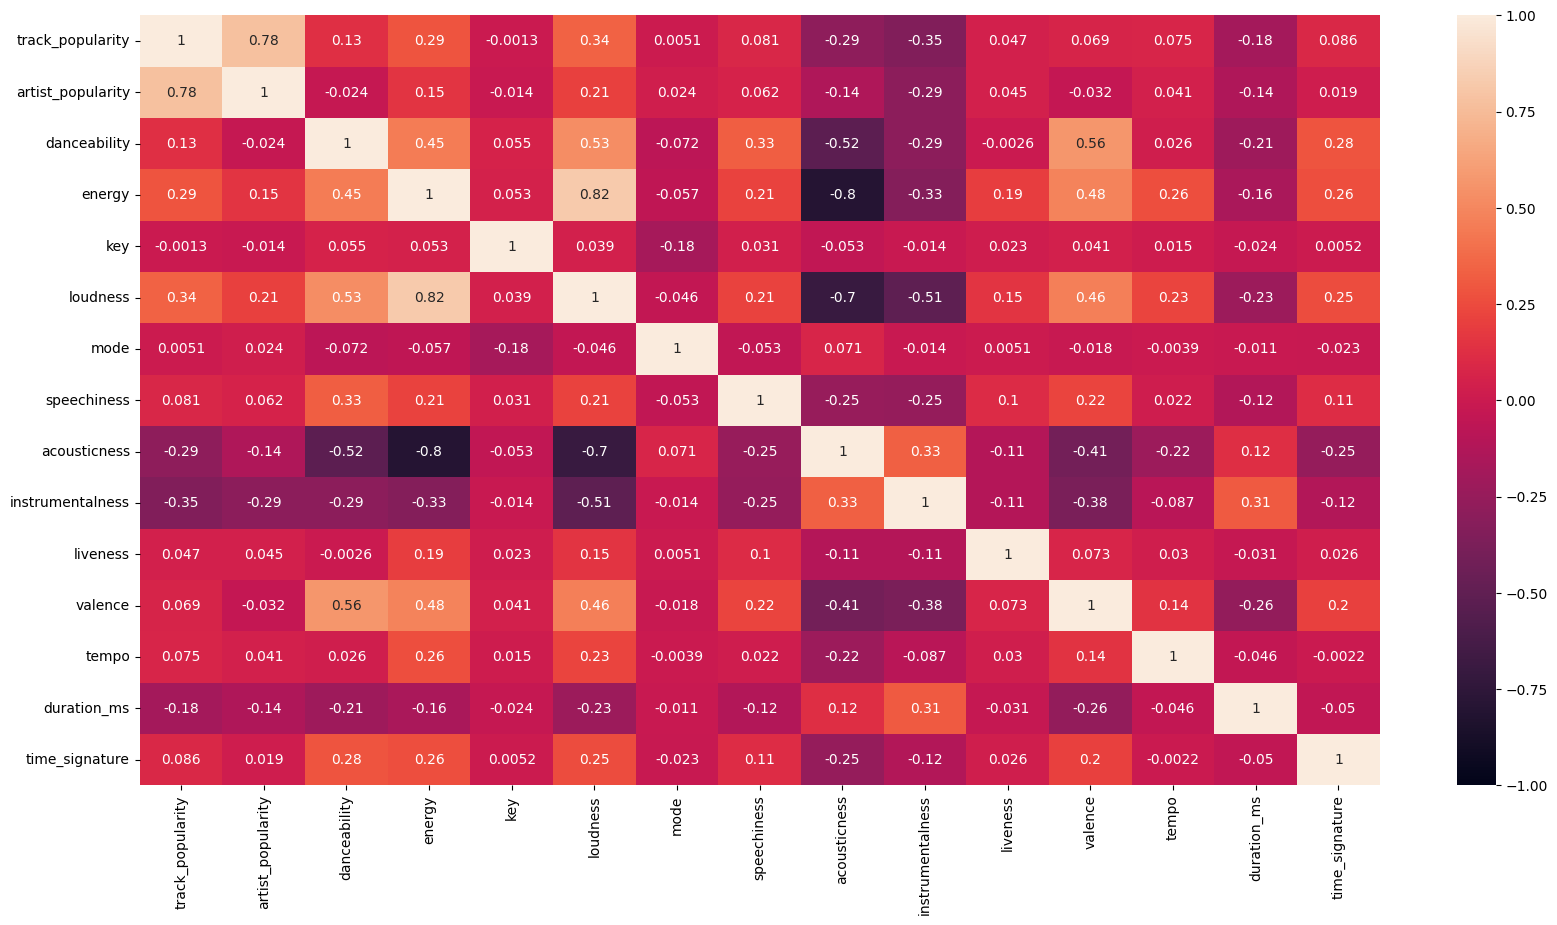

In [ ]:
#Correlation matrix
np.bool = np.bool_
myColors = ("purple","white","orange")
cmap1 = clr.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
corr = df.drop(columns=['genre','playlist_name'],inplace=False).corr()
mask = np.zeros_like(corr, dtype=np.bool)
plt.figure(figsize=(20,10))
sns.heatmap(corr,mask = mask, vmin = -1, vmax = 1, annot=True)

In [ ]:
#Encodes categorical features
df = pd.get_dummies(df, columns=['playlist_name','genre'],dtype='int64')

#Train test split
X = df.drop('track_popularity', axis=1)
y = df['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression Model
#Linear Regression is trained using the Ordinary Least Squares(OLS) method.
lrm = LinearRegression()
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
r_squared = r2_score(y_test, y_pred)
lrm_error = mean_absolute_error(y_test, y_pred)
lrm_variance = explained_variance_score(y_test, y_pred)



#Decision Tree
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
dt = clf.fit(X_train,y_train)

y_pred = dt.predict(X_test)
dt_r2 = r2_score(y_test, y_pred)
dt_error = mean_absolute_error(y_test, y_pred)
dt_variance = explained_variance_score(y_test, y_pred)

#optimization algorithms
#optimization algorithms
#the optimizaiton algorithm used for a Decision Tree is the CART or Classification and Regression Trees.
#It is based on recursive binary splitting. Each fork is split into a predictor variable and each node has a prediction for the target variable.


#KNN model
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=3)
kn_model = kn.fit(X, y)

y_pred = kn_model.predict(X_test)
knn_r2 = r2_score(y_test, y_pred)
knn_error = mean_absolute_error(y_test, y_pred)
knn_variance = explained_variance_score(y_test, y_pred)

print("Linear Regression Model\nR2 Score:", r_squared, "\nMean Absolute Error:", lrm_error, "\nExplained Variance:", lrm_variance, "\n")
print("Decision Tree\nR2 Score:", dt_r2, "\nMean Absolute Error:", dt_error, "\nExplained Variance:", dt_variance, "\n")
print("KNN\nR2 Score:", knn_r2, "\nMean Absolute Error:", knn_error, "\nExplained Variance:", knn_variance, "\n")

Linear Regression Model
R2 Score: 0.7793175508576387 
Mean Absolute Error: 6.101457339702396 
Explained Variance: 0.7794739600878164 

Decision Tree
R2 Score: 0.5493415123962704 
Mean Absolute Error: 8.38695652173913 
Explained Variance: 0.5506067197207338 

KNN
R2 Score: 0.5077891211499042 
Mean Absolute Error: 9.641123188405796 
Explained Variance: 0.50836669570778 



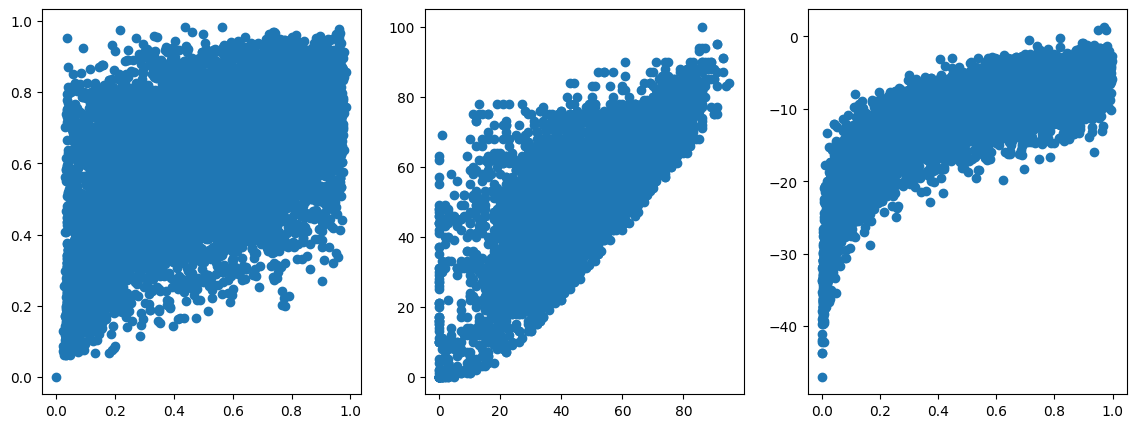

In [ ]:
#Scatter plots
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(14,5))

# Create a scatter plot
axes[0].scatter(df['valence'], df['danceability'])
# Create a scatter plot
axes[1].scatter(df['track_popularity'], df['artist_popularity'])
# Create a scatter plot
axes[2].scatter(df['energy'], df['loudness'])

# Display the plot
plt.show()

In [ ]:
#3D scatterplot
fig = px.scatter_3d(df, x='danceability', y='energy', z='valence', width=600, height=600, color='track_popularity')
fig.update_traces(marker=dict(size=5))
fig.show()